In [22]:
import polars as pl
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})
import matplotlib.pyplot as plt

In [2]:
# leemos al CSV resultante del query de SQL
# link: https://drive.google.com/file/d/1AsVge_vqG32fzq-prySnjjhGZVra7aJO/view?usp=share_link

df = pd.read_csv('billetaje_ML_data.csv').dropna()
df

,serialtarjeta,unique_number_serialtarjeta,unique_number_idsam_stddev,unique_number_idsam_median,unique_number_idsam_avg,unique_number_producto_stddev,unique_number_producto_median,unique_number_producto_avg,unique_number_idrutaestacion_stddev,unique_number_idrutaestacion_median,...,identidad_avg,tipoevento_stddev,tipoevento_median,tipoevento_avg,latitude_stddev,latitude_median,latitude_avg,longitude_stddev,longitude_median,longitude_avg
0,609a54195efed5eec5893417e6dfc81e,588757,0.0,1,1,0.0,1,1,0.0,1,...,2.520118,0.000000,4,4.000000,2.094399,-25.33490,-25.163553,4.757622,-57.58123,-57.174784
1,558bd532932c6e008257e4b8c8ed6f81,521194,0.0,1,1,0.0,1,1,0.0,1,...,2.931034,0.000000,4,4.000000,0.051992,-25.35723,-25.376363,0.055113,-57.43938,-57.430863
2,af735bb9774b40bb206f951210048a32,1069458,0.0,1,1,0.0,1,1,0.0,1,...,2.644444,0.000000,4,4.000000,0.064607,-25.39634,-25.384997,0.028021,-57.54571,-57.550438
3,4307434bef5b96e0348b1fc0a15eaeee,408079,0.0,1,1,0.0,1,1,0.0,1,...,2.347826,0.000000,4,4.000000,3.723262,-25.24737,-24.703332,8.487945,-57.55035,-56.316365
4,f7c5a44a607d71db345dc898fdbb9503,1509403,0.0,1,1,0.0,1,1,0.0,1,...,2.666667,0.000000,4,4.000000,0.013439,-25.25065,-25.248507,0.025313,-57.55409,-57.556550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559516,ef557456db002f05ea74ab6171bc6639,1457768,0.0,1,1,0.0,1,1,0.0,1,...,2.750000,0.000000,4,4.000000,0.018780,-25.32676,-25.330566,0.013122,-57.59632,-57.588061
1559517,02881e39e1e21085ba092dcd568d80f4,15397,0.0,1,1,0.0,1,1,0.0,1,...,2.407407,0.000000,4,4.000000,3.945238,-25.26473,-24.639878,8.990670,-57.59288,-56.153553
1559518,b8d2da72ead48eece0b155ecb14715c1,1126396,0.0,1,1,0.0,1,1,0.0,1,...,2.736111,0.471405,4,4.055556,2.992954,-25.39400,-25.043226,6.765639,-57.41059,-56.611003
1559520,70ed9b294db9c715a209de48dc589a9e,688095,0.0,1,1,0.0,1,1,0.0,1,...,3.000000,0.000000,4,4.000000,0.008562,-25.39339,-25.398333,0.025744,-57.54664,-57.531777


El diccionario de datos facilitado por [https://github.com/luchobenitez/monda-guasu](https://github.com/luchobenitez/monda-guasu)

|Campo|Descripción|Tipo de Dato|
|-----|-----------|------------|
|serialtarjeta|Identificador de la tarjeta. Puede ser nominal o no, por lo que se puede llegar a la identidad del pasajero. Para nuestro análisis asumimos que es un pasajero|hash md5|
|idsam|Identificador del chip instalado en el equipo verificador. No necesariamente permanece con el mismo equipo verificador. Puede cambiar de bus, inclusive de línea o de EOT. Asumimos que identifica al bus|string|
|fechahoraevento|Timestamp del inicio del viaje|timestamp|
|producto|Tipo de producto donde:  - CR. Crédito o saldo negativo de la tarjeta - ES. Uso Especial (Estudiante o discapacitado) - MO. Monedero o uso normal|string|
|montoevento|Monto del evento descontado de la tarjeta. |entero|
|consecutivoevento|Identificador consecutivo de numero de transacción realizado con la tarjeta identificada con serialtarjeta|entero|
|identidad|Se refiere al propietario del validador donde: - 1. VMT - 2. MAS - 3. JAHA |entero|
|tipoevento|Tipo de evento donde: - 4. Viaje Normal - 8. Devolución - 10. Recarga de la tarjeta. - 14. Devolucion. Utilizaremos solo los del tipo 4|punto flotante|
|longitude|Longitud geográfica|punto flotante|
|Latitude|Latitude geográfica|punto flotante|
|idrutaestacion|Identificador de ruta asociado a una EOT. Ver tabla adicional|string|
|tipotransporte|Tipo de transporte donde - 0. Bus municipal interno - 1. Normal  - 3. Diferencial|entero|

In [5]:
# Nuestras columnas
df.columns

Index(['serialtarjeta', 'unique_number_serialtarjeta',
       'unique_number_idsam_stddev', 'unique_number_idsam_median',
       'unique_number_idsam_avg', 'unique_number_producto_stddev',
       'unique_number_producto_median', 'unique_number_producto_avg',
       'unique_number_idrutaestacion_stddev',
       'unique_number_idrutaestacion_median',
       'unique_number_idrutaestacion_avg', 'montoevento_stddev',
       'montoevento_median', 'montoevento_avg', 'consecutivoevento_stddev',
       'consecutivoevento_median', 'consecutivoevento_avg', 'identidad_stddev',
       'identidad_median', 'identidad_avg', 'tipoevento_stddev',
       'tipoevento_median', 'tipoevento_avg', 'latitude_stddev',
       'latitude_median', 'latitude_avg', 'longitude_stddev',
       'longitude_median', 'longitude_avg'],
      dtype='object')

In [11]:
# create a normalized dataframe with all columns except serialtarjeta and identidad. 
skip_cols = ['serialtarjeta', 'unique_number_serialtarjeta', 'identidad_median', 'identidad_avg', 'identidad_stddev']
df_norm = df.drop(columns=skip_cols)
df_norm = StandardScaler().fit_transform(df_norm)
df_norm = pd.DataFrame(df_norm, columns=df.drop(columns=skip_cols).columns)
df_norm

,unique_number_idsam_stddev,unique_number_idsam_median,unique_number_idsam_avg,unique_number_producto_stddev,unique_number_producto_median,unique_number_producto_avg,unique_number_idrutaestacion_stddev,unique_number_idrutaestacion_median,unique_number_idrutaestacion_avg,montoevento_stddev,...,consecutivoevento_avg,tipoevento_stddev,tipoevento_median,tipoevento_avg,latitude_stddev,latitude_median,latitude_avg,longitude_stddev,longitude_median,longitude_avg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.691400,...,1.711241,-0.374796,-0.000808,-0.192123,-0.026345,-0.053350,-0.287481,-0.022678,-0.054563,-0.280966
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077169,...,-0.050956,-0.374796,-0.000808,-0.192123,-0.842591,-0.085036,-0.481127,-0.846894,0.033844,-0.383515
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.972464,...,-0.108315,-0.374796,-0.000808,-0.192123,-0.837549,-0.140534,-0.488983,-0.851642,-0.032426,-0.431401
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.786723,...,-0.208596,-0.374796,-0.000808,-0.192123,0.624628,0.070857,0.131297,0.631141,-0.035317,0.062798
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.027264,...,-0.229569,-0.374796,-0.000808,-0.192123,-0.857998,0.066202,-0.364784,-0.852117,-0.037648,-0.433848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.879373,...,-0.231827,-0.374796,-0.000808,-0.192123,-0.855864,-0.041799,-0.439454,-0.854253,-0.063968,-0.446467
1529944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.853913,...,-0.179112,-0.374796,-0.000808,-0.192123,0.713340,0.046223,0.189036,0.719255,-0.061824,0.127998
1529945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.949255,...,-0.193497,2.760464,-0.000808,1.447502,0.332761,-0.137214,-0.177989,0.329270,0.051788,-0.055193
1529946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.040745,...,-0.220007,-0.374796,-0.000808,-0.192123,-0.859947,-0.136348,-0.501119,-0.852041,-0.033005,-0.423927


<AxesSubplot:xlabel='identidad_median', ylabel='count'>

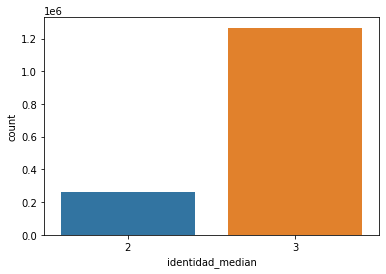

In [16]:
# create a barplot of the identidad_median value counts
sns.countplot(x='identidad_median', data=df)

AutoML directory: explainable_ai/explain_column
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 1 model
y_true takes value in {'2', '3'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.
1_Default_RandomForest logloss 0.372178 trained in 448.61 seconds
* Step ensemble will try to check up to 1 model
AutoML fit time: 455.71 seconds
AutoML best model: 1_Default_RandomForest


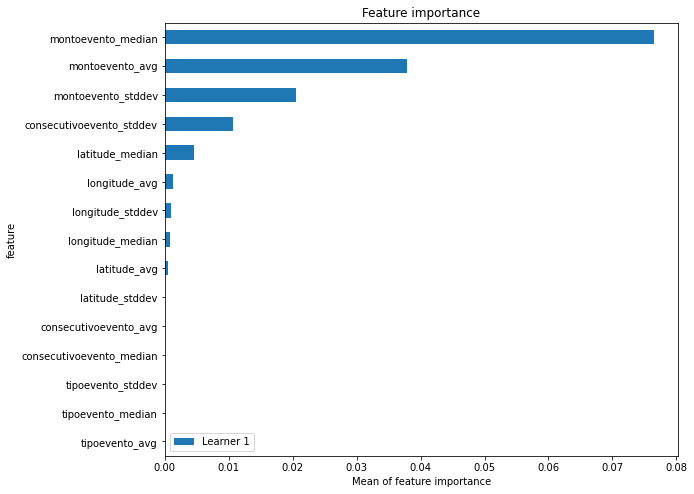

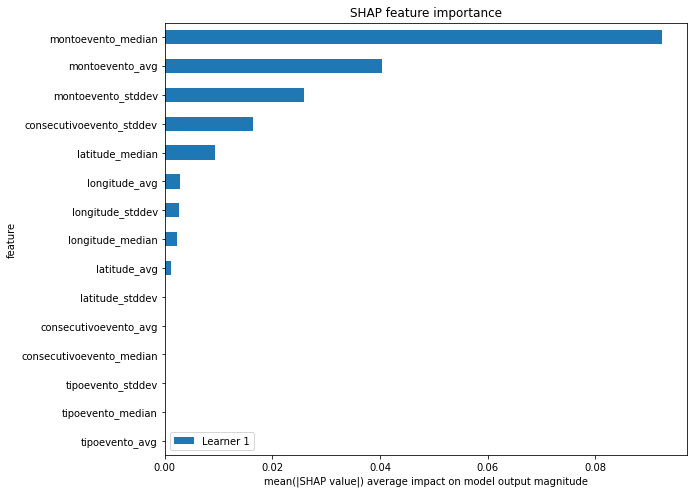

In [12]:
from supervised.automl import AutoML

name = f'explain_column'
model_path = f'explainable_ai/{name}'

# automl = AutoML(mode=mode, results_path=model_path, total_time_limit=24*3600, eval_metric=sign_penalty)
automl = AutoML(mode='Explain', results_path=model_path, total_time_limit=1*3600, algorithms=['Random Forest'])
automl.fit(df_norm, df['identidad_median'])

# create the markdown report
automl.report()